In [87]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
sb.set() # set the default Seaborn style for graphics

# Importing Data

In [74]:
train_data = pd.read_csv('train.csv')
train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Understanding our data

In [75]:
for var in train_data:
    print("Value Count for:", var)
    print(train_data[var].value_counts())
    print("---------------------------------------------------")

Value Count for: PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64
---------------------------------------------------
Value Count for: Survived
0    549
1    342
Name: Survived, dtype: int64
---------------------------------------------------
Value Count for: Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
---------------------------------------------------
Value Count for: Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                   

### **Categories to note:**

From the value count, we can identify some categorical variables that would be important for our models

---

- Sex
> Male: 577\
> Female: 314

- Sibsp
> 0: 608\
> 1: 209\
> 2: 28\
> 3: 16\
> 4: 18\
> 5: 5\
> 8: 7

- Parch
> 0: 678\
> 1: 118\
> 2: 80\
> 3: 5\
> 4: 4\
> 5: 5\
> 6: 1

- Pclass
> 1: 216\
> 2: 184\
> 3: 491

- Embarked
> S: 644\
> C: 168\
> Q: 77

- Survived
> 1: 342\
> 0: 549

# Data Cleaning

## Missing values

Missing values reduce the data quality and thus, they must be handled. On encountering missing values, we have two main options:

1. We can drop the column with missing values. This is usually used when there are too many missing values to be filled.
<br>
<br>
2. Filling in the missing values using measures such as mean and median.

In [76]:
# checking for missing values in training data
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Age
<br>
As we can see Age column has a lot of missing values in the data, thus it must be handled.

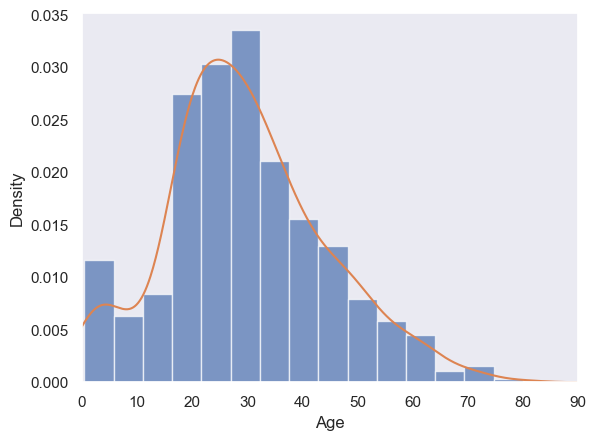

In [77]:
ax = train_data['Age'].hist(bins=15, density=True, stacked=True, alpha=0.7)

train_data['Age'].plot(kind='density')

ax.set(xlabel='Age')
plt.xlim(0, 90)
plt.grid()
plt.show()

#### The above density plot and histogram indicate a positive skew since the graph is skewed towards the right. Thus, using median to fill in missing values will be better.

In [78]:
#Mean of the 'Age' column
print("Mean:   ", train_data["Age"].mean(skipna=True)) #skipna helps skip the missing data
#Median of the 'Age' column
print("Median: ", train_data["Age"].median())

Mean:    29.69911764705882
Median:  28.0


## Cabin
<br>
The missing values under 'Cabin' must be handled too.

In [79]:
#Percentage of the missing values on the 'Cabin' column
train_data["Cabin"].isnull().sum()/train_data.shape[0]*100

77.10437710437711

##### Approximately, 77% of the data in the Cabin column is missing.
The percentage is too high to be handled thus, we should drop this column.

## Embarked
<br>
Embarked is a categorical variable that tells us where the passengers boarded the ship

In [80]:
#Percentage of the missing values on 'Embarked' columns
train_data["Embarked"].isnull().sum()/train_data.shape[0]*100

0.22446689113355783

#### Since the percentage of missing values is only 0.22%, we can handle these.

Places where passengers embarked :(C = Cherbourg, Q = Queenstown, S = Southampton)


S    644
C    168
Q     77
Name: Embarked, dtype: int64

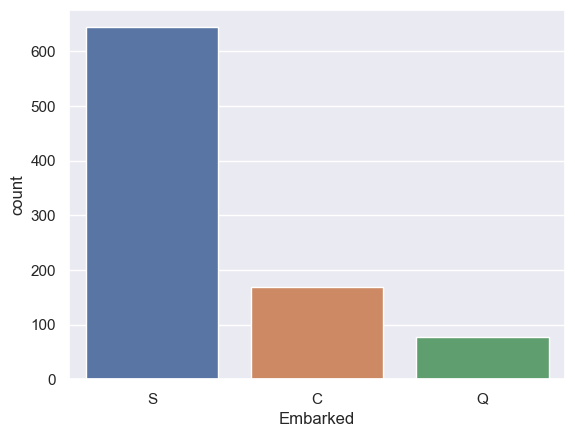

In [81]:
# looking at where the passengers get in.
sb.countplot(data=train_data,x=train_data["Embarked"])
#Exact number of passengers embarking at different places
print("Places where passengers embarked :(C = Cherbourg, Q = Queenstown, S = Southampton)")
train_data["Embarked"].value_counts()

#### As we can see from the above analysis, maximum passengers embarked at Southampton(S). 

Since the 'Embark' column is a categorical variable, we cannot fill in the missing values using mean or median as these are calculated for numeeical values.

We can use the **mode** instead.

Thus, based on the analysis, as maximum passengers embarked at Southampton by a huge margin, our best bet would be to fill the missing values with S(Southampton)

##### Filling in missing values for training data

In [82]:
#Age
train_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True)
#Embarked
train_data["Embarked"].fillna(train_data['Embarked'].value_counts().idxmax(), inplace=True)
#Cabin
train_data.drop('Cabin', axis=1, inplace=True)
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data adjustments

### Number of Family Members

We can combine Sibsp and Parch into a single variable, **'FamilyMembers'**

In [84]:
train_data['FamilyMembers'] = train_data['SibSp'] + train_data['Parch']
train_data.drop(["SibSp", "Parch"], axis = 1, inplace=True)

### Title of individuals

We can identify the titles of each individual in the "Names" column, which can help us further categorise the individuals, rather than dealing with each individual unique name.

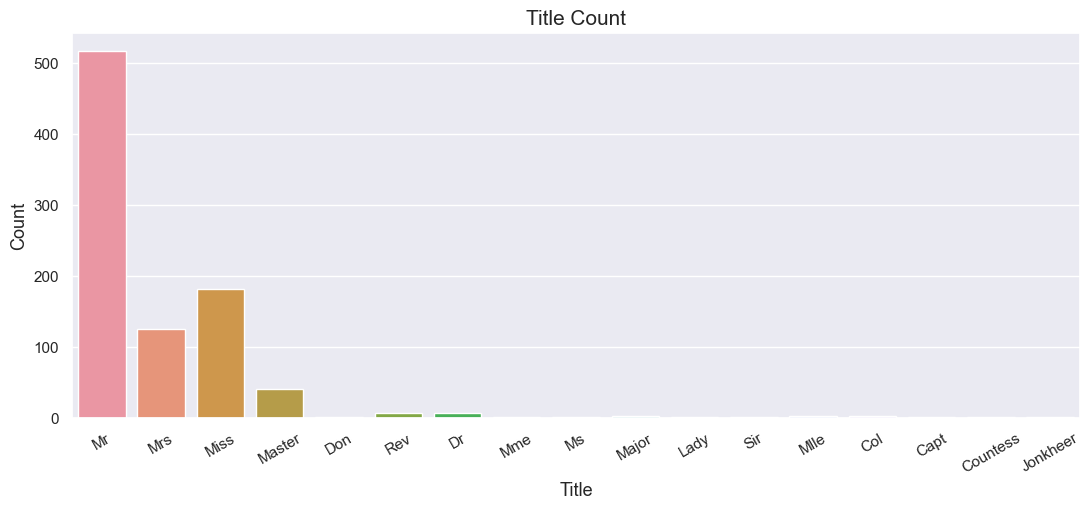

In [88]:
train_data['Title'] = train_data.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
plt.figure(figsize=(13,5))
sb.countplot(data=train_data, x='Title')
plt.xlabel("Title", fontsize=13) #seting the xtitle and size
plt.ylabel("Count", fontsize=13) # Seting the ytitle and size
plt.title("Title Count", fontsize=15)
plt.xticks(rotation=30)
plt.show()

#### In order to use the 'Titles' to give us a better insight, we decided to further categorise some of the titles based on the social status of their title, whenever possible.

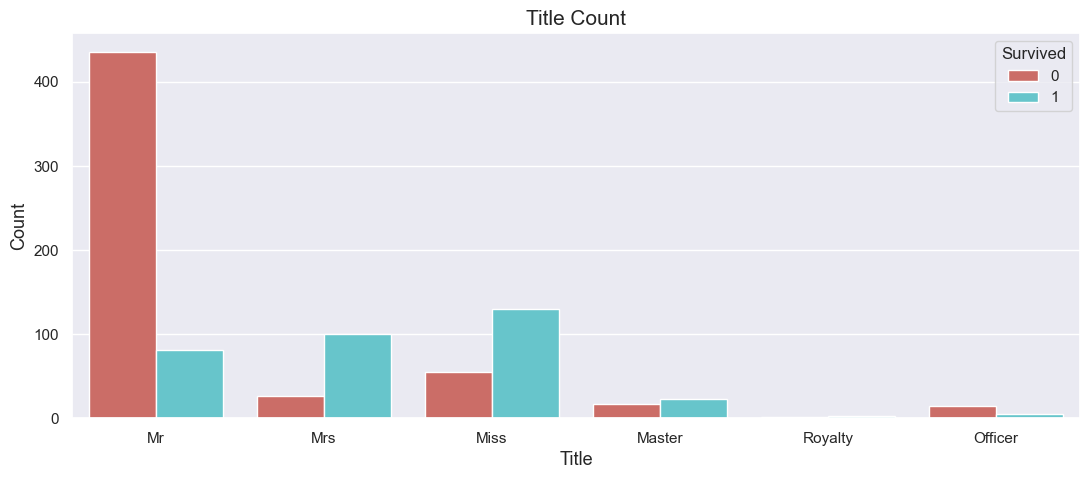

In [89]:
train_data['Title'] = train_data['Title'].replace(['Capt', 'Col', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Officer')  
train_data['Title'] = train_data['Title'].replace(['Jonkheer', 'Dona', 'Don', 'Countess', 'Lady', 'Sir'], 'Royalty')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')

plt.figure(figsize=(13,5))
sb.countplot(data=train_data, x='Title', palette="hls", hue="Survived")
plt.xlabel("Title", fontsize=13) #seting the xtitle and size
plt.ylabel("Count", fontsize=13) # Seting the ytitle and size
plt.title("Title Count", fontsize=15)
plt.show()

In [93]:
print("Titles Categories: ",train_data['Title'].unique())

Titles Categories:  ['Mr' 'Mrs' 'Miss' 'Master' 'Royalty' 'Officer']


### Age Categories


We can also try grouping age into bins.

Text(0.5, 1.0, 'Title Count')

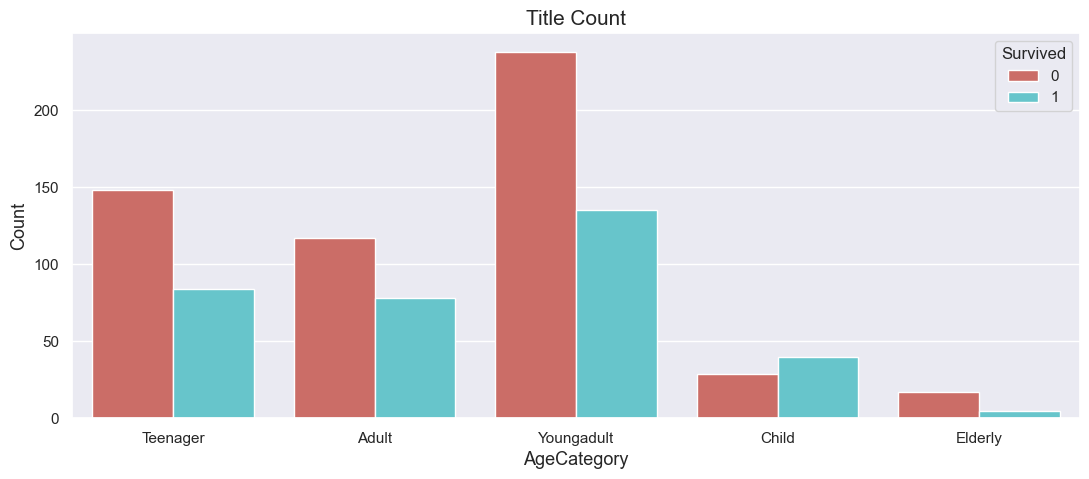

In [97]:
bins = [-1, 12, 25, 35, 60, 100]
labels = ['Child', 'Teenager', 'Youngadult', 'Adult', 'Elderly']
train_data['AgeCategory'] = pd.cut(train_data["Age"], bins, labels = labels).astype('object')

plt.figure(figsize=(13,5))
sb.countplot(data=train_data, x='AgeCategory', palette="hls", hue="Survived")
plt.xlabel("AgeCategory", fontsize=13) #seting the xtitle and size
plt.ylabel("Count", fontsize=13) # Seting the ytitle and size
plt.title("Title Count", fontsize=15)

In [99]:
print("AgeCategory: ",train_data['AgeCategory'].unique())

AgeCategory:  ['Teenager' 'Adult' 'Youngadult' 'Child' 'Elderly']


In [102]:
#Review our data so far
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilyMembers,Title,AgeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,Mr,Teenager
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,Miss,Youngadult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,Mrs,Youngadult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,Mr,Youngadult


# Encoding